# IMPORT LIBARARIES

In [105]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline 

# CREATE DATASET 

In [106]:
# data read
data = pd.read_csv('final-auto2011-2018.csv')


In [107]:
# describe() method returns description of the data in the DataFrame
data.describe()

,Prod.,sales,Interest rates,Exchange rates
count,84.000000,84.000000,84.000000,84.000000
mean,96562.321429,96542.940476,9.443929,134.195388
std,38072.379345,37999.824385,2.374022,24.411879
min,53906.000000,55456.000000,6.030000,93.303200
25%,65574.000000,66519.500000,7.085000,113.457200
50%,72279.000000,72153.500000,9.695000,134.207200
75%,129824.500000,130279.750000,10.652500,154.957200
max,176931.000000,176931.000000,14.620000,175.707200


In [108]:
#  Display the Data
data.head()

,Prod.,sales,Make,Type,dates,Interest rates,Exchange rates
0,72873.0,74748.0,TOTAL,None,31-07-11,14.62,94.5883
1,70726.0,72399.0,TOTAL,None,31-08-11,14.22,93.5417
2,76342.0,73300.0,TOTAL,None,30-09-11,14.28,94.7190
3,69669.0,70809.0,TOTAL,None,31-10-11,13.97,93.3032
4,68472.0,68196.0,TOTAL,None,30-11-11,13.58,95.5799


In [109]:
# Datatype of Each Column
print(data.dtypes)

Prod.             float64
sales             float64
Make               object
Type               object
dates              object
Interest rates    float64
Exchange rates    float64
dtype: object


In [110]:
# ALL info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Prod.           84 non-null     float64
 1   sales           84 non-null     float64
 2   Make            84 non-null     object 
 3   Type            84 non-null     object 
 4   dates           84 non-null     object 
 5   Interest rates  84 non-null     float64
 6   Exchange rates  84 non-null     float64
dtypes: float64(4), object(3)
memory usage: 5.7+ KB


In [111]:
# Using unique() method
print(data.dtypes.unique())

[dtype('float64') dtype('O')]


In [112]:
# null values as missing or missing data 

null_columns=data.columns[data.isnull().any()]
print(data[null_columns].isnull().sum())

Prod.             18
sales             18
Make              18
Type              18
dates             18
Interest rates    18
Exchange rates    18
dtype: int64


In [113]:

data[data.isnull().any(axis=1)][null_columns].head()

,Prod.,sales,Make,Type,dates,Interest rates,Exchange rates
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
# fillna() method replaces the NULL values with a specified value

data=data.fillna(0)
data.head(-30)

,Prod.,sales,Make,Type,dates,Interest rates,Exchange rates
0,72873.0,74748.0,TOTAL,None,31-07-11,14.62,94.5883
1,70726.0,72399.0,TOTAL,None,31-08-11,14.22,93.5417
2,76342.0,73300.0,TOTAL,None,30-09-11,14.28,94.7190
3,69669.0,70809.0,TOTAL,None,31-10-11,13.97,93.3032
4,68472.0,68196.0,TOTAL,None,30-11-11,13.58,95.5799
...,...,...,...,...,...,...,...
67,135503.0,135507.0,TOTAL,None,28-02-17,6.95,159.7072
68,140000.0,138877.0,TOTAL,None,31-03-17,6.93,160.7072
69,139444.0,137550.0,TOTAL,None,30-04-17,6.90,161.7072
70,153547.0,155855.0,TOTAL,None,31-05-17,6.93,162.7072


# VISUALIZATION

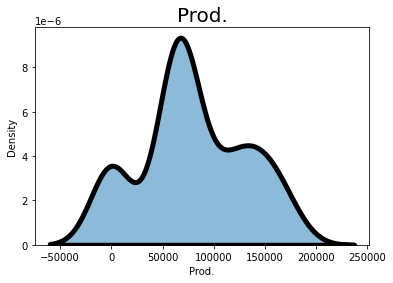

In [115]:
''' Matplotlib, Seaborn and many other such data visualization packages with different features for creating informative,
customized, and appealing plots to present data'''

sns.kdeplot(x = data['Prod.'] , shade = True , linewidth = 5 , alpha = 0.5 , edgecolor = 'black')
plt.title('Prod.' , fontsize = 20)
plt.show()

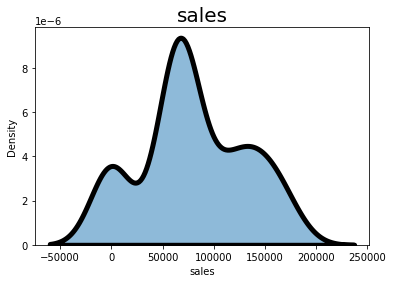

In [116]:


sns.kdeplot(x = data['sales'] , shade = True , linewidth = 5 , alpha = 0.5 , edgecolor = 'black')
plt.title('sales' , fontsize = 20)
plt.show()

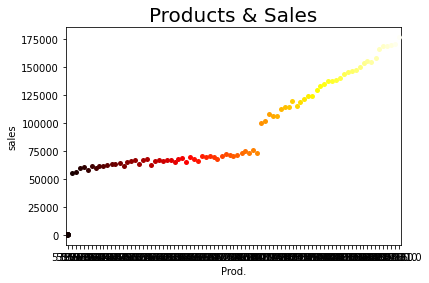

In [117]:
 sns.stripplot(x = data['Prod.'] , y = data['sales'] , palette = 'hot')
 plt.title('Products & Sales' , fontsize = 20)
 plt.show()

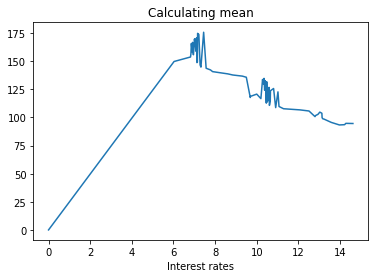

In [118]:
# groupby() function is used to split the data into groups

data.groupby('Interest rates')['Exchange rates'].mean().plot()
plt.title('Calculating mean')
plt.show()

In [119]:

# Convert Dataset into Dependent & Independent Matrix

columns = ['Prod.', 'Interest rates', 'Exchange rates']
X = data[columns]
Y = data['sales']
print(X)
print(Y)

       Prod.  Interest rates  Exchange rates
0    72873.0           14.62         94.5883
1    70726.0           14.22         93.5417
2    76342.0           14.28         94.7190
3    69669.0           13.97         93.3032
4    68472.0           13.58         95.5799
..       ...             ...             ...
97       0.0            0.00          0.0000
98       0.0            0.00          0.0000
99       0.0            0.00          0.0000
100      0.0            0.00          0.0000
101      0.0            0.00          0.0000

[102 rows x 3 columns]
0      74748.0
1      72399.0
2      73300.0
3      70809.0
4      68196.0
        ...   
97         0.0
98         0.0
99         0.0
100        0.0
101        0.0
Name: sales, Length: 102, dtype: float64


# PREPROCESSING

In [120]:
# Define the Label
Label = ['Prod.' , 'sales' , 'Make' , 'Type' , 'dates' , 'Interest rates' , 'Exchnage rates']  

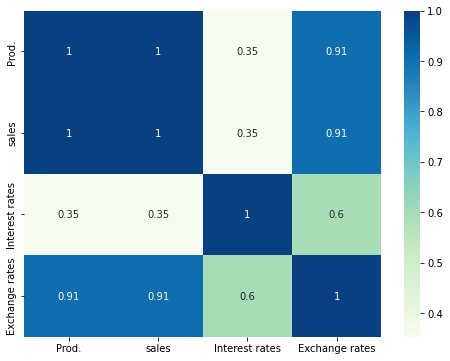

In [121]:
# Displat the Correlation Table
correlation = data.corr()
# Display the Correlation Table by using HeatMap

plt.figure(figsize = (8,6))
sns.heatmap(correlation , cmap = 'GnBu' , annot = True)
plt.show()

In [122]:
# Split the Dataset into (Train & Test)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

# ML MODELS:

# DecisionTreeRegressor

In [123]:
 # import the regressor
from sklearn.tree import DecisionTreeRegressor 

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, Y)


DecisionTreeRegressor(random_state=0)

In [143]:
# predicting a new value
  
# test the output by changing values, like 74748.0
y_pred = regressor.predict([[74748.0]])
  
# print the predicted price
print("Predicted price: % d\n"% y_pred) 

Predicted price:  73783



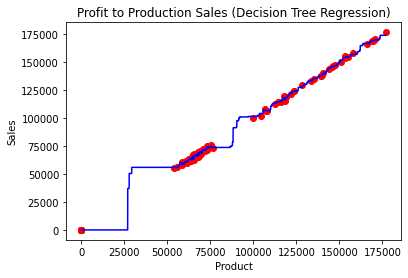

In [149]:
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values

X_grid = np.arange(min(X), max(X), 0.01)

# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
#X_grid = X_grid.reshape((len(X_grid), 1)) 
X_grid = X_grid.reshape((len(X_grid), 1))
  
  
# scatter plot for original data
plt.scatter(X, Y, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Profit to Production Sales (Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('Product')
  
# specify Y axis label
plt.ylabel('Sales')
  
# show the plot
plt.show()

# LinearRegression

In [128]:

from sklearn.linear_model import LinearRegression
LR = LinearRegression()

# Fit the Model 
LR.fit(X_train, y_train)

# Accuracy of the  LinearRegression 


LR.score(X_test, y_test)


0.9994546081301757

In [129]:
# predict the LinearRegression
predict_LR = LR.predict(X_test)
print(predict_LR)

[ 6.76342816e+04 -4.16325702e+01  7.69715555e+04  1.06672939e+05
 -4.16325702e+01 -4.16325702e+01  7.00823190e+04  1.43674163e+05
  1.17876574e+05  1.39774392e+05  1.04196230e+05 -4.16325702e+01
  1.69900988e+05  6.61002765e+04  6.52131269e+04  6.90479729e+04
  6.69042411e+04  6.53414887e+04  6.12910128e+04  7.21597278e+04
  6.11196735e+04  1.23356184e+05  7.02600833e+04  1.46028419e+05
  7.02694293e+04  9.99443083e+04  6.81109314e+04 -4.16325702e+01
  1.69091353e+05  1.68677834e+05  1.06913992e+05 -4.16325702e+01
 -4.16325702e+01  1.50453107e+05]


In [130]:
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

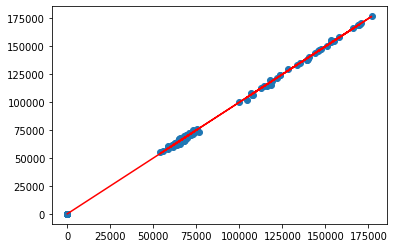

In [131]:
# plotting the graph
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

# MULTIPLE LINEAR REGRESSION 

In [132]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(X_train,y_train)

y_pred=linreg.predict(X_test)
y_pred



array([ 6.76342816e+04, -4.16325702e+01,  7.69715555e+04,  1.06672939e+05,
       -4.16325702e+01, -4.16325702e+01,  7.00823190e+04,  1.43674163e+05,
        1.17876574e+05,  1.39774392e+05,  1.04196230e+05, -4.16325702e+01,
        1.69900988e+05,  6.61002765e+04,  6.52131269e+04,  6.90479729e+04,
        6.69042411e+04,  6.53414887e+04,  6.12910128e+04,  7.21597278e+04,
        6.11196735e+04,  1.23356184e+05,  7.02600833e+04,  1.46028419e+05,
        7.02694293e+04,  9.99443083e+04,  6.81109314e+04, -4.16325702e+01,
        1.69091353e+05,  1.68677834e+05,  1.06913992e+05, -4.16325702e+01,
       -4.16325702e+01,  1.50453107e+05])

In [133]:
from sklearn.metrics import r2_score

Accuracy=r2_score(y_test,y_pred)* 74748.0
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 74707.23


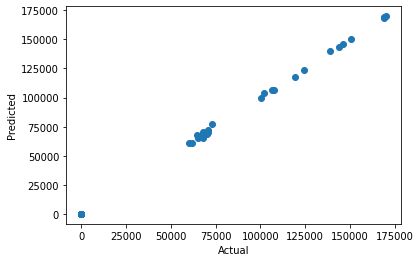

In [134]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

# Random Forest

In [145]:
 # Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X, Y) 

C:\Users\Windows 10 Pro\AppData\Local\Temp\ipykernel_1772\644966471.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


RandomForestRegressor(random_state=0)

In [146]:
Y_pred = regressor.predict(np.array([74748.0]).reshape(1, 1))  # test the output by changing values

# print the predicted price
print("Predicted price: % d\n"% Y_pred) 

Predicted price:  73783



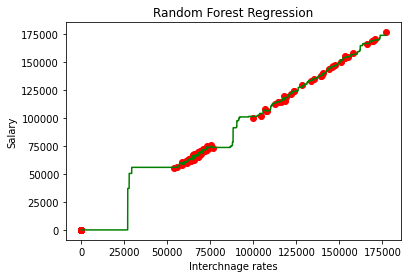

In [147]:
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X), max(X), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X, Y, color = 'red')
  

# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Interchnage rates')
plt.ylabel('Salary')
plt.show()

In [138]:

# Classification Report of RF classifier
report_RF = classification_report(y_test , prediction_RF)
print(report_RF)




              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
     60160.0       0.00      0.00      0.00         1
     60927.0       0.00      0.00      0.00         0
     61611.0       0.00      0.00      0.00         1
     63068.0       0.00      0.00      0.00         0
     63431.0       0.00      0.00      0.00         0
     64913.0       0.00      0.00      0.00         1
     65011.0       0.00      0.00      0.00         1
     66416.0       0.00      0.00      0.00         0
     66974.0       0.00      0.00      0.00         1
     67190.0       0.00      0.00      0.00         0
     67273.0       0.00      0.00      0.00         1
     67329.0       0.00      0.00      0.00         0
     67579.0       0.00      0.00      0.00         1
     67744.0       0.00      0.00      0.00         1
     68065.0       0.00      0.00      0.00         1
     69204.0       0.00      0.00      0.00         0
     69357.0       0.00    

C:\Users\Windows 10 Pro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows 10 Pro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows 10 Pro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 

# SVC MODEL

In [139]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf')

# Fit the model 
svc.fit(X_train , y_train)

# Predict the Result 
prediction_svc = svc.predict(X_test)

In [140]:
# Accuracy of the SVC classifier
accuracy_score_svc = accuracy_score(prediction_svc , y_test)

C:\Users\Windows 10 Pro\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:102: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype("float") / total_samples


(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

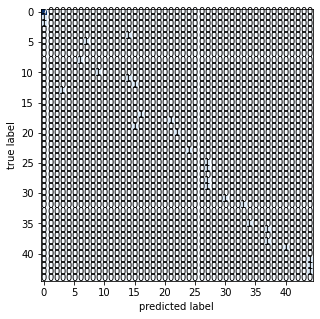

In [141]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
y_test
mat = confusion_matrix(y_test, prediction_svc)
plot_confusion_matrix(conf_mat=mat, figsize=(5, 5))

In [142]:
# Classification Report of SVC classifier
report_svc = classification_report(y_test , prediction_svc)
print(report_svc)

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88         7
     60160.0       0.00      0.00      0.00         1
     61611.0       0.00      0.00      0.00         1
     62212.0       0.00      0.00      0.00         0
     64913.0       0.00      0.00      0.00         1
     65011.0       0.00      0.00      0.00         1
     65877.0       0.00      0.00      0.00         0
     66565.0       0.00      0.00      0.00         0
     66974.0       0.00      0.00      0.00         1
     67190.0       0.00      0.00      0.00         0
     67273.0       0.00      0.00      0.00         1
     67579.0       0.00      0.00      0.00         1
     67744.0       0.00      0.00      0.00         1
     68065.0       0.00      0.00      0.00         1
     69204.0       0.00      0.00      0.00         0
     69304.0       0.00      0.00      0.00         0
     69357.0       0.00      0.00      0.00         0
     70504.0       0.00    

C:\Users\Windows 10 Pro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows 10 Pro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows 10 Pro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 